<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/Copy_of_LS_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt
!python -m spacy download en_core_web_md

--2020-09-28 20:26:00--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-09-28 20:26:01 (7.05 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 171kB/s 
     |████████████████████████████████| 1.6MB 43.2MB/s 
     |████████████████████████████████| 10.4MB 38.4MB/s 
     |████████████████████████████████| 7.1MB 42.3MB/s 
     |████████████████████████████████| 215kB 42.5MB/s 
     |████████████████████████████████| 2.2MB 39.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.w

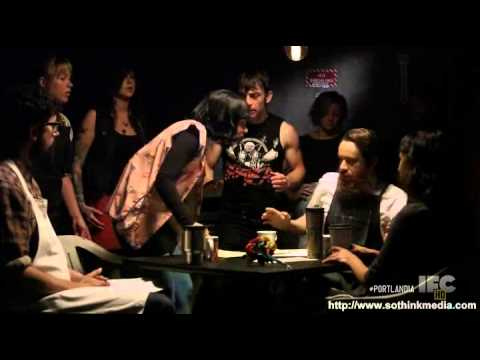

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

'/content'

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [ ]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [ ]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [ ]:
shops['star_rating'][0][1]

'5'

In [ ]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

The star rating is now an integer, making ranking easier

In [ ]:
# Overall Word / Token Count
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [ ]:
shops['full_review_text'][0].split(' ')[2:][:5]

['1', 'check-in', 'Love', 'love', 'loved']

In [ ]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_md")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import re
def tokenize(series):
  series = series.lower() # Lower case
  pattern = '[^a-zA-Z 0-9]'
  series = re.sub('[^a-zA-Z 0-9]', '', series)
  # Return a list without the date or leading or trailing space

  return [token for token in series.split(' ')[2:-1] if token is not ' ']

shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens'][0][:5]

['1', 'checkin', 'love', 'love', 'loved']

In [ ]:
word_counts = Counter()

shops['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(5)

[('the', 34809), ('and', 26650), ('a', 22755), ('', 21906), ('i', 20237)]

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc if token.text is not ' ']
    tokens.append(doc_tokens)

shops['tokens_spacy'] = tokens

In [ ]:
shops['tokens_spacy'].head()

0    [11/25/2016, 1, check-in, Love, love, loved, t...
1    [12/2/2016, Listed, in, Date, Night:, Austin,,...
2    [11/30/2016, 1, check-in, Listed, in, Brunch, ...
3    [11/25/2016, Very, cool, decor!, Good, drinks,...
4    [12/3/2016, 1, check-in, They, are, located, w...
Name: tokens_spacy, dtype: object

In [ ]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

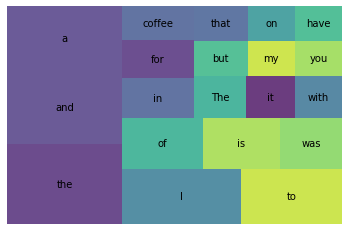

In [ ]:
wc = count(shops['tokens_spacy'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,tokens_spacy,tokens_no_stop_words
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[1, checkin, love, love, loved, the, atmospher...","[11/25/2016, 1, check-in, Love, love, loved, t...","[ , 11/25/2016, 1, check-in, love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, in, Date, Night:, Austin,,...","[ , 12/2/2016, listed, date, night:, austin,, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[1, checkin, listed, in, brunch, spots, i, lov...","[11/30/2016, 1, check-in, Listed, in, Brunch, ...","[ , 11/30/2016, 1, check-in, listed, brunch, s..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, Very, cool, decor!, Good, drinks,...","[ , 11/25/2016, cool, decor!, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[1, checkin, they, are, located, within, the, ...","[12/3/2016, 1, check-in, They, are, located, w...","[ , 12/3/2016, 1, check-in, located, northcros..."


In [ ]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.text is not ' '):
            doc_tokens.append(token.lemma_.lower())

    tokens.append(doc_tokens)

shops['tokens_no_stop_words'] = tokens
shops['tokens_no_stop_words']

0       [11/25/2016, 1, check-in, love, love, love, at...
1       [12/2/2016, listed, date, night:, austin,, amb...
2       [11/30/2016, 1, check-in, listed, brunch, spot...
3       [11/25/2016, cool, decor!, good, drink, nice, ...
4       [12/3/2016, 1, check-in, locate, northcross, m...
                              ...                        
7611    [2/19/2015, actually, step, restaurant, chance...
7612    [1/21/2016, ok,, steeping, room, awesome., gre...
7613    [4/30/2015, loved, come, tea,, atmosphere, pre...
7614    [8/2/2015, food, average., booth, didn't, feel...
7615    [5/23/2015, finally, stop, lunch, colleague, i...
Name: tokens_no_stop_words, Length: 7616, dtype: object

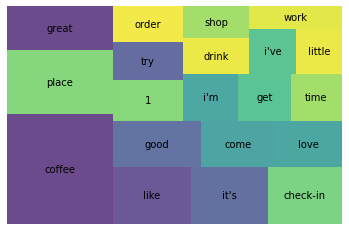

In [ ]:
wc = count(shops['tokens_no_stop_words'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
shops['tokens_no_stop_words'].head()

0    [11/25/2016, 1, check-in, love, love, love, at...
1    [12/2/2016, listed, date, night:, austin,, amb...
2    [11/30/2016, 1, check-in, listed, brunch, spot...
3    [11/25/2016, cool, decor!, good, drink, nice, ...
4    [12/3/2016, 1, check-in, locate, northcross, m...
Name: tokens_no_stop_words, dtype: object

In [ ]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,coffee,4243,8201,1.0,0.020543,0.020543,0.557117
71,place,3245,4744,2.0,0.011883,0.032426,0.426077
77,great,2454,3272,3.0,0.008196,0.040622,0.322216
185,like,2166,3147,4.0,0.007883,0.048505,0.284401
271,it's,2061,3117,5.0,0.007808,0.056313,0.270614


In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,tokens_spacy,tokens_no_stop_words
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[1, checkin, love, love, loved, the, atmospher...","[11/25/2016, 1, check-in, Love, love, loved, t...","[11/25/2016, 1, check-in, love, love, love, at..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, in, Date, Night:, Austin,,...","[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[1, checkin, listed, in, brunch, spots, i, lov...","[11/30/2016, 1, check-in, Listed, in, Brunch, ...","[11/30/2016, 1, check-in, listed, brunch, spot..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, Very, cool, decor!, Good, drinks,...","[11/25/2016, cool, decor!, good, drink, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[1, checkin, they, are, located, within, the, ...","[12/3/2016, 1, check-in, They, are, located, w...","[12/3/2016, 1, check-in, locate, northcross, m..."


In [ ]:
shops['love_sum'] = shops['tokens_no_stop_words'].apply(lambda lst: lst.count('love'))
shops.sort_values('love_sum', ascending=False).head().full_review_text[5597]

' 8/28/2015 1 check-in Love the vibe Love the patio Love the light hearted staff who clearly enjoy their job Love the selections Love the parking situation Love the location Love the free wifi, space, and abundance of outlets Love the Tshirts Love the music '

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

